In [ ]:
### ENSEMBLE TECHNIQUE

# THEORY

1. Can we use Bagging for regression problems.
  - Bagging (Bootstrap Aggregating) is an ensemble learning technique that aims to improve the accuracy and stability of machine learning models by combining the predictions of multiple base learners trained on different subsets of the training data.

Here's how bagging works for regression:

Bootstrap Sampling: Multiple subsets of the training data are created by randomly sampling data points with replacement. This means that some data points may appear multiple times in a single subset, while others may be excluded.
Model Training: A base learner (e.g., a decision tree) is trained on each of the bootstrapped subsets.
Prediction Aggregation: For a given input, each trained model makes a prediction. The final prediction is obtained by averaging the predictions of all the individual models (for regression).
Example using scikit-learn in Python


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a BaggingRegressor with DecisionTreeRegressor as the base learner
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Train the model on the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_regressor.predict(X_test)
Use code with caution
In this example, BaggingRegressor is used with DecisionTreeRegressor as the base learner. n_estimators specifies the number of base learners to train (10 in this case), and random_state ensures reproducibility.

Benefits of Bagging for Regression:

Reduced Variance: By averaging the predictions of multiple models, bagging reduces the variance of the overall model, making it less prone to overfitting.
Improved Accuracy: Bagging can improve the accuracy of the model, especially when the base learner is unstable (e.g., decision trees).
Robustness to Outliers: Bagging is less sensitive to outliers in the training data compared to individual models.


2. What is the difference between multiple model training and single model training?
  -Single Model Training

In single model training, you train a single model on your entire dataset. This model is then used to make predictions on new data. This approach is straightforward and often works well for simple problems.

Multiple Model Training (Ensemble Methods)

In multiple model training, you train multiple models on different subsets of the data or using different algorithms. The predictions from these models are then combined to produce a final prediction. This approach is often used to improve the accuracy and robustness of models, especially for complex problems.

Here's a table summarizing the key differences:

Feature	Single Model Training	Multiple Model Training (Ensemble Methods)
Number of Models	One	Multiple
Training Data	Entire dataset	Subsets of the data or different datasets
Algorithms	Single algorithm	Multiple algorithms or variations of the same algorithm
Prediction	Based on a single model	Based on a combination of predictions from multiple models
Complexity	Simpler	More complex
Accuracy	Can be good for simple problems	Often higher for complex problems
Robustness	Can be sensitive to noise and outliers	More robust to noise and outliers
Computational Cost	Lower	Higher
Advantages of Multiple Model Training (Ensembles)

Improved Accuracy: Ensembles often achieve higher accuracy than single models, especially for complex problems.
Reduced Variance: Ensembles can reduce the variance of the model, making it less prone to overfitting.
Increased Robustness: Ensembles are more robust to noise and outliers in the data.
Disadvantages of Multiple Model Training (Ensembles)

Increased Complexity: Ensembles are more complex to train and deploy than single models.
Higher Computational Cost: Ensembles require more computational resources to train and make predictions.
Difficult to Interpret: Ensembles can be difficult to interpret, making it harder to understand why they make certain predictions.
When to Use Each Approach

Single Model Training: If you have a simple problem with a limited dataset, a single model may be sufficient.
Multiple Model Training (Ensembles): If you have a complex problem with a large dataset, an ensemble method may be more appropriate.


3. Explain the concept of feature randomness in Random Forest.
  - Feature randomness, also known as attribute bagging or random subspace method, is a crucial aspect of the Random Forest algorithm that contributes to its effectiveness and robustness. It involves randomly selecting a subset of features (or attributes) at each node during the construction of decision trees in the forest.

Here's how it works:

Standard Decision Trees: In traditional decision trees, at each node, the algorithm considers all available features to find the best split that maximizes information gain or minimizes impurity.

Random Forest with Feature Randomness: In contrast, Random Forest introduces randomness by considering only a randomly selected subset of features at each node. The size of this subset is typically denoted by max_features hyperparameter. This means that each tree in the forest is built using a different random subset of features.

Benefits of Feature Randomness

Reduced Correlation between Trees: By using different subsets of features for each tree, feature randomness decorrelates the trees in the forest. This is important because if the trees were highly correlated, they would make similar errors, and the ensemble would not be as effective.

Increased Diversity: Feature randomness promotes diversity in the forest by allowing different trees to focus on different aspects of the data. This leads to a more robust model that is less prone to overfitting.

Improved Generalization: The combination of reduced correlation and increased diversity results in a model that generalizes better to unseen data.

Example

Imagine you have a dataset with 10 features. In a standard decision tree, at each node, the algorithm would consider all 10 features to find the best split. However, in a Random Forest with max_features set to 5, the algorithm would randomly select 5 features at each node and consider only those for the split. This process is repeated for each tree in the forest, resulting in a diverse set of trees.

Impact on Performance

The optimal value for max_features depends on the specific dataset and problem. In general, lower values of max_features lead to greater diversity and reduced correlation, which can improve generalization but may slightly decrease the performance on the training data. Higher values of max_features increase the correlation between trees, which can improve performance on the training data but may lead to overfitting.

4. What is OOB (Out-of-Bag) Score?
  - OOB (Out-of-Bag) Score is a method for evaluating the performance of a Random Forest model without the need for a separate validation dataset. It is based on the idea that during the bootstrapping process, some data points are not included in the training set for each individual tree. These data points are referred to as "out-of-bag" samples.

How it Works

Bootstrap Sampling: When training a Random Forest, each tree is built using a bootstrapped sample of the training data. This means that some data points are left out (out-of-bag) for each tree.

OOB Prediction: For each data point in the training set, predictions are made by the trees that did not use that data point in their training (i.e., the trees for which the data point was out-of-bag).

OOB Score Calculation: The OOB score is then calculated by aggregating the predictions for each data point and comparing them to the true values. For classification tasks, it is typically the accuracy of the OOB predictions. For regression tasks, it is typically the mean squared error (MSE) or R-squared value.

Benefits of OOB Score

No Need for Validation Set: OOB score eliminates the need for a separate validation set, which can be beneficial when the dataset is limited.

Efficient Use of Data: It utilizes all the training data for both training and evaluation.

Unbiased Estimate of Performance: OOB score provides an unbiased estimate of the model's performance on unseen data.

Example

Consider a Random Forest with 100 trees. For each data point in the training set, approximately 37% of the trees will not have used that data point in their training (due to the nature of bootstrapping). These trees can be used to make predictions for that data point, and the OOB score is calculated based on these predictions.

In scikit-learn, you can enable OOB score calculation by setting oob_score=True when creating the RandomForestClassifier or RandomForestRegressor.


from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)

oob_score = rf_classifier.oob_score_
print("OOB Score:", oob_score)

5. How can you measure the importance of features in a Random Forest model?
  - Random Forest models offer a built-in mechanism to assess feature importance, which helps understand which features contribute most to the model's predictive power. This information is valuable for feature selection, understanding the underlying data relationships, and improving model interpretability.

Here's how feature importance is calculated in a Random Forest:

1. Gini Importance (or Mean Decrease Impurity):

This method is based on the Gini impurity, a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset.
For each feature, the decrease in Gini impurity achieved by splits based on that feature is accumulated across all trees in the forest.
The average decrease in Gini impurity over all trees is then used as the feature importance score.
Higher Gini importance values indicate more important features.
2. Permutation Importance (or Mean Decrease Accuracy):

This method involves randomly shuffling the values of a specific feature in the out-of-bag (OOB) samples for each tree and measuring the decrease in model performance (e.g., accuracy or R-squared).
The average decrease in performance across all trees is used as the feature importance score for that feature.
Higher permutation importance values indicate more important features, as their shuffling leads to a larger drop in model performance.
Accessing Feature Importance in scikit-learn:

In scikit-learn, you can access the feature importance scores using the feature_importances_ attribute of the trained Random Forest model.


from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Print or visualize feature importances
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {feature_importances[i]}")
Use code with caution
You can further visualize feature importances using libraries like matplotlib or seaborn for better interpretation.

Interpreting Feature Importance:

Features with higher importance scores contribute more significantly to the model's predictions.
Features with low importance scores might be considered for removal or further investigation.
It's important to note that feature importance scores can be influenced by factors like data scaling, feature correlations, and the specific dataset.

6.  Explain the working principle of a Bagging Classifier.

  - Bagging, short for Bootstrap Aggregating, is an ensemble learning technique that aims to improve the accuracy and stability of classification models. It works by combining the predictions of multiple base classifiers trained on different subsets of the training data.

Here's a breakdown of the working principle:

Bootstrap Sampling:

The Bagging Classifier starts by creating multiple subsets of the training data using bootstrap sampling.
In bootstrap sampling, data points are randomly selected with replacement from the original training set. This means that some data points may appear multiple times in a single subset, while others may be excluded.
Typically, the number of subsets created is equal to the number of base classifiers you want to use in the ensemble.
Training Base Classifiers:

A base classifier (e.g., a decision tree) is trained on each of the bootstrapped subsets independently.
Each base classifier learns from a slightly different perspective of the data due to the variations introduced by bootstrap sampling.
Aggregation of Predictions:

When making predictions on new data, each base classifier in the ensemble provides its individual prediction.
The Bagging Classifier then aggregates these predictions to produce a final prediction.
For classification tasks, the aggregation is typically done by majority voting. The class that receives the most votes from the base classifiers is chosen as the final prediction.
Example using scikit-learn in Python


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a BaggingClassifier with DecisionTreeClassifier as the base classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)
Use code with caution
In this example, BaggingClassifier is used with DecisionTreeClassifier as the base classifier. n_estimators specifies the number of base classifiers to train (10 in this case), and random_state ensures reproducibility.

Benefits of Bagging Classifier:

Reduced Variance: By combining the predictions of multiple base classifiers, Bagging reduces the variance of the overall model, making it less prone to overfitting.
Improved Accuracy: Bagging can improve the accuracy of the model, especially when the base classifier is unstable (e.g., decision trees).
Robustness to Outliers: Bagging is less sensitive to outliers in the training data compared to individual base classifiers.


7. How do you evaluate a Bagging Classifier’s performance?
  - Evaluating the performance of a Bagging Classifier is essential to ensure that the model is generalizing well to unseen data and making accurate predictions. Several metrics and techniques can be used for this purpose.

Here are some common approaches:

Accuracy: Accuracy is the most straightforward metric and represents the percentage of correctly classified instances. It is calculated as the ratio of the number of correct predictions to the total number of predictions.

Precision and Recall: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. These metrics are particularly useful when dealing with imbalanced datasets.

F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of both metrics. It is often used when there is a trade-off between precision and recall.

ROC AUC: The Receiver Operating Characteristic (ROC) curve is a graphical representation of the model's performance at various classification thresholds. The Area Under the Curve (AUC) is a summary measure of the ROC curve, representing the model's ability to distinguish between positive and negative classes. A higher AUC indicates better performance.

Cross-Validation: Cross-validation is a technique to assess the model's performance on unseen data by splitting the dataset into multiple folds. The model is trained on a subset of the folds and evaluated on the remaining fold. This process is repeated for all folds, and the results are averaged to obtain a more robust estimate of performance.

Out-of-Bag (OOB) Score: As discussed earlier, the OOB score provides an estimate of the model's performance without the need for a separate validation set. It is calculated using the out-of-bag samples during the bootstrapping process.

In scikit-learn, you can use various functions to calculate these metrics, such as accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, and cross_val_score.


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Assuming you have trained a Bagging Classifier named 'bagging_classifier'
# and have test data X_test and y_test

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate ROC AUC (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

# Perform cross-validation
cv_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

8. How does a Bagging Regressor work?
  - A Bagging Regressor, similar to a Bagging Classifier, is an ensemble learning method that leverages the concept of bagging (Bootstrap Aggregating) to improve the accuracy and stability of regression models. It works by combining the predictions of multiple base regressors trained on different subsets of the training data.

Here's a breakdown of the working principle:

Bootstrap Sampling:

The Bagging Regressor starts by creating multiple subsets of the training data using bootstrap sampling.
In bootstrap sampling, data points are randomly selected with replacement from the original training set. This means that some data points may appear multiple times in a single subset, while others may be excluded.
The number of subsets created typically equals the number of base regressors you want to use in the ensemble.
Training Base Regressors:

A base regressor (e.g., a decision tree regressor) is trained on each of the bootstrapped subsets independently.
Each base regressor learns from a slightly different perspective of the data due to the variations introduced by bootstrap sampling.
Aggregation of Predictions:

When making predictions on new data, each base regressor in the ensemble provides its individual prediction.
The Bagging Regressor then aggregates these predictions to produce a final prediction.
For regression tasks, the aggregation is typically done by averaging the predictions of all the base regressors. This averaging helps to reduce variance and improve the overall prediction accuracy.
Example using scikit-learn in Python


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a BaggingRegressor with DecisionTreeRegressor as the base regressor
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Train the model on the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_regressor.predict(X_test)
Use code with caution
In this example, BaggingRegressor is used with DecisionTreeRegressor as the base regressor. n_estimators specifies the number of base regressors to train (10 in this case), and random_state ensures reproducibility.

Benefits of Bagging Regressor:

Reduced Variance: By averaging the predictions of multiple base regressors, Bagging reduces the variance of the overall model, making it less prone to overfitting. This is particularly beneficial when using base regressors that are prone to overfitting, such as decision trees.
Improved Accuracy: Bagging can improve the accuracy of the model by combining the strengths of multiple base regressors. The averaging effect helps to smooth out individual prediction errors and produce a more accurate overall prediction.

 9. What is the main advantage of ensemble techniques?
   - The main advantage of ensemble techniques in machine learning is their ability to significantly improve predictive performance compared to using a single model. This improvement is achieved by combining the predictions of multiple individual models, which often leads to better generalization and robustness.

Here's a breakdown of how ensemble techniques achieve this advantage:

Reduced Variance and Overfitting: Ensemble methods, particularly bagging and boosting, effectively reduce the variance of the overall model by averaging or weighting the predictions of multiple models. This reduction in variance makes the model less prone to overfitting, meaning it is more likely to perform well on unseen data.

Improved Accuracy: By combining the strengths of multiple models, ensemble techniques often achieve higher accuracy than individual models. Different models may excel in capturing different aspects of the data or relationships between features, and ensemble methods leverage this diversity to produce a more comprehensive and accurate prediction.

Increased Robustness: Ensemble methods are more robust to noise and outliers in the data compared to single models. The aggregation process helps to mitigate the impact of individual errors or biases, leading to a more stable and reliable prediction.

Better Generalization: As a result of reduced overfitting and increased robustness, ensemble methods tend to generalize better to unseen data. This means they are more likely to perform well on new, unseen data points, which is a crucial aspect of a successful machine learning model.


10. What is the main challenge of ensemble methods?

  -Ensemble methods, while powerful, present some challenges. The primary challenge is ensuring diversity among the base models. Here's a breakdown:

Reasoning:

Ensemble Power: Ensembles work best when the individual models (base learners) make different kinds of errors. This diversity allows the ensemble to compensate for the weaknesses of individual models and produce a more robust and accurate prediction.
Homogeneous Models: If the base models are too similar (homogeneous), they will likely make the same errors. Combining their predictions won't significantly improve accuracy, as they are essentially echoing each other.
Diversity is Key: The key is to create an ensemble where the base models are diverse enough to capture different aspects of the data and make different types of errors. This diversity can be achieved through various techniques, such as:
Using different algorithms for the base models.
Training the base models on different subsets of the data (e.g., bagging or boosting).
Introducing randomness in the model training process (e.g., random forests).
Impact:

Without sufficient diversity, ensemble methods may not achieve their full potential for improved accuracy and robustness. In some cases, they might even perform worse than a single well-tuned model.

Addressing the Challenge:

Careful selection and configuration of base models and ensemble techniques are crucial to address this challenge. Experimentation and model evaluation are essential to ensure that the ensemble achieves the desired diversity and performance.

11. Explain the key idea behind ensemble techniques.

  - The central idea behind ensemble techniques is to combine the predictions of multiple individual models (base learners) to produce a more accurate and robust prediction than any single model could achieve alone.

Here's a breakdown of the key principles:

Wisdom of the Crowd: Ensemble techniques are inspired by the "wisdom of the crowd" principle, which suggests that collective intelligence is often superior to individual opinions. In machine learning, this translates to combining the predictions of multiple models to achieve a better overall prediction.

Diversity of Models: Ensemble methods leverage the diversity of different models. Each base learner may have its strengths and weaknesses, capturing different aspects of the data or relationships between features. By combining their predictions, the ensemble can benefit from the strengths of each model while mitigating their individual weaknesses.

Error Reduction: Ensemble techniques aim to reduce prediction errors by combining predictions from multiple models. Different models may make different types of errors, and the ensemble can compensate for these errors by averaging or weighting the predictions. This leads to a more accurate and stable overall prediction.

Improved Generalization: Ensemble methods often lead to better generalization, meaning the models are more likely to perform well on unseen data. This is achieved by reducing overfitting, which is the tendency of a model to memorize the training data and perform poorly on new data. By combining predictions from multiple models, the ensemble is less likely to overfit and more likely to generalize well.

In essence, ensemble techniques are about leveraging the collective intelligence of multiple models to achieve a more accurate, robust, and generalizable prediction than any single model could achieve on its own. This approach has proven to be highly effective in various machine learning tasks and is widely used in practice.

12. What is a Random Forest Classifier?
  - A Random Forest Classifier is an ensemble learning method that belongs to the bagging technique. It constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

Here's a breakdown of its key characteristics:

Ensemble of Decision Trees: A Random Forest is essentially a collection of decision trees, where each tree is trained on a different subset of the training data.

Bootstrap Sampling: The training data for each tree is selected using bootstrap sampling, which involves randomly selecting data points with replacement from the original dataset. This introduces diversity among the trees.

Feature Randomness: In addition to bootstrap sampling, Random Forest also introduces feature randomness. At each node of a decision tree, only a random subset of features is considered for splitting, further increasing diversity.

Aggregation of Predictions: When making predictions, each tree in the forest casts a vote for the class it predicts. The final prediction is determined by majority voting, where the class with the most votes is selected.

Benefits: Random Forest Classifiers offer several advantages, including:

High accuracy: They often achieve high accuracy compared to individual decision trees.
Robustness to overfitting: The ensemble nature and randomness help prevent overfitting to the training data.
Handling of missing values: They can handle missing values effectively.
Feature importance estimation: They provide insights into the importance of different features.
In simpler terms, imagine a group of experts (decision trees) making predictions about a problem. Each expert has access to different information and perspectives. The Random Forest Classifier combines their predictions to arrive at a final decision that is often more accurate and reliable than any single expert's opinion.

13. What are the main types of ensemble techniques?
  - Ensemble techniques in machine learning can be broadly categorized into three main types:

Bagging:

Bootstrap Aggregating, or bagging, involves training multiple base learners (typically decision trees) on different subsets of the training data, created through bootstrap sampling (random sampling with replacement).
The predictions from individual learners are then aggregated (e.g., by averaging or majority voting) to produce the final prediction.
Bagging helps reduce variance and overfitting, leading to more robust models.
Example: Random Forest is a popular bagging algorithm.
Boosting:

Boosting focuses on sequentially training base learners, where each subsequent learner is trained to correct the errors made by the previous learners.
Learners are given weights, and those that perform well are given higher weights in the final prediction.
Boosting aims to reduce bias and improve overall accuracy.
Example: AdaBoost, Gradient Boosting, and XGBoost are well-known boosting algorithms.
Stacking:

Stacking involves training multiple diverse base learners and then using a meta-learner to combine their predictions.
The base learners' predictions are used as input features for the meta-learner, which learns how to best combine them for the final prediction.
Stacking can potentially achieve higher accuracy by leveraging the strengths of different base learners.
Example: Stacking with logistic regression as the meta-learner.
In addition to these main types, there are other ensemble techniques, such as:

Voting: Combining predictions from multiple models using simple voting schemes (e.g., majority voting, weighted voting).
Averaging: Averaging the predictions of multiple models, often used for regression tasks.
The choice of ensemble technique depends on the specific problem, dataset, and desired performance goals. It's often beneficial to experiment with different techniques to find the one that works best for your particular use case.

14. What is ensemble learning in machine learning?
  -Okay, let's discuss ensemble learning in machine learning:

Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and then combined to get better results than could be obtained from any of the individual models alone.

The idea is that by combining the predictions of multiple models, the overall prediction accuracy and robustness can be significantly improved. It is based on the principle that a group of "weak learners" can come together to form a "strong learner."

Here's a breakdown of the key aspects of ensemble learning:

Multiple Models: Ensemble learning involves using multiple models, typically of the same type or different types, to make predictions. These models are trained on the same dataset or different subsets of the dataset.

Combination of Predictions: The predictions from individual models are combined in some way to produce the final prediction. This combination can be done through various methods, such as averaging, voting, or weighted averaging.

Improved Accuracy and Robustness: Ensemble learning aims to improve the overall accuracy and robustness of the prediction by leveraging the strengths of multiple models. It can reduce overfitting, handle noise and outliers better, and provide a more stable prediction.

Types of Ensemble Methods: There are various types of ensemble methods, including bagging, boosting, and stacking, each with its own approach to combining models.

Widely Used: Ensemble learning is widely used in various machine learning applications, including classification, regression, and anomaly detection, due to its effectiveness in improving predictive performance.

In simpler terms, ensemble learning is like having a team of experts with different skills and perspectives working together to solve a problem. By combining their individual insights, the team can arrive at a better solution than any single expert could on their own.

15. When should we avoid using ensemble methods?
  -While ensemble methods are generally powerful and can significantly improve predictive performance, there are certain situations where they might not be the best choice. Here are some scenarios when you should consider avoiding ensemble methods:

Simple Problems with Limited Data: If you have a relatively simple problem with a small dataset, a single, well-tuned model might be sufficient. Ensemble methods can introduce unnecessary complexity and computational overhead in such cases.

High Computational Cost: Ensemble methods, especially complex ones like boosting or stacking, can be computationally expensive to train and deploy. If you have limited computational resources or strict time constraints, a single model might be a more practical choice.

Interpretability is Crucial: Ensemble methods can be more difficult to interpret compared to single models. If understanding the underlying relationships and reasoning behind the predictions is essential, a simpler model might be preferred.

Data with High Noise Levels: While ensemble methods can handle some noise, extremely noisy data might lead to overfitting, even with ensembles. In such cases, focusing on data cleaning and preprocessing might be more effective than using ensembles.

Deployment Constraints: Deploying ensemble models can be more complex than deploying single models. If you have strict deployment requirements or limitations, a single model might be easier to integrate.

In general, it's crucial to carefully consider the trade-offs between performance, complexity, interpretability, and computational cost when deciding whether to use ensemble methods. If the potential benefits of improved accuracy and robustness outweigh the drawbacks, then ensemble methods can be a valuable tool.

Here's a quick summary table:

Scenario	Avoid Ensemble Methods?	Reasoning
Simple problem, limited data	Yes	Unnecessary complexity, overhead
High computational cost	Yes	Resource constraints, time limitations
Interpretability is crucial	Yes	Difficult to interpret ensembles
Data with high noise levels	Consider	Potential overfitting
Deployment constraints	Consider	Complex deployment

16.  How does Bagging help in reducing overfitting?
  - Okay, let's explore how Bagging helps in reducing overfitting:

Bagging, short for Bootstrap Aggregating, is an ensemble technique that helps reduce overfitting by creating multiple subsets of the training data and training a separate model on each subset. The predictions from these individual models are then combined to produce a final prediction.

Here's a breakdown of how Bagging reduces overfitting:

Bootstrap Sampling: Bagging uses bootstrap sampling to create multiple subsets of the training data. In bootstrap sampling, data points are randomly selected with replacement from the original training set. This means that some data points may appear multiple times in a single subset, while others may be excluded.

Diverse Models: By training individual models on different subsets of the data, Bagging creates a diverse set of models. Each model learns from a slightly different perspective of the data due to the variations introduced by bootstrap sampling.

Reduced Variance: The diversity among the models helps to reduce the overall variance of the ensemble. When the predictions from individual models are combined, the errors tend to cancel each other out, resulting in a more stable and less sensitive prediction. This reduction in variance is a key factor in reducing overfitting, as overfitting often occurs when a model is too complex and captures noise in the training data.

Improved Generalization: By reducing overfitting, Bagging helps the model to generalize better to unseen data. This means that the model is more likely to perform well on new, unseen data points, which is a crucial aspect of a successful machine learning model.

In simpler terms, imagine a group of experts (individual models) making predictions about a problem. Each expert has access to different information and perspectives. Bagging combines their predictions to arrive at a final decision that is often more accurate and less influenced by the biases of any single expert.

In summary, Bagging helps reduce overfitting by:

Creating diverse models through bootstrap sampling.
Reducing variance by combining predictions from multiple models.
Improving generalization to unseen data.

17. Why is Random Forest better than a single Decision Tree?
  -Random Forest, being an ensemble method that combines multiple Decision Trees, offers several advantages over using a single Decision Tree:

Reduced Overfitting: Random Forest significantly reduces overfitting compared to a single Decision Tree. This is achieved through the use of bootstrap aggregating (bagging) and feature randomness. Bagging creates multiple subsets of the training data, and each tree is trained on a different subset. Feature randomness further decorrelates the trees by considering only a random subset of features at each node. This diversity among trees helps to prevent the model from memorizing the training data and improves its ability to generalize to unseen data.

Increased Accuracy: Random Forest generally achieves higher accuracy compared to a single Decision Tree. By combining the predictions of multiple trees, the ensemble can leverage the strengths of individual trees while mitigating their weaknesses. This leads to a more robust and accurate prediction overall.

Robustness to Noise and Outliers: Random Forest is more robust to noise and outliers in the data compared to a single Decision Tree. The averaging or voting mechanism used to combine predictions from multiple trees helps to reduce the impact of individual errors or biases, leading to a more stable and reliable prediction.

Feature Importance Estimation: Random Forest provides insights into the importance of different features in the dataset. This information can be valuable for feature selection, understanding the underlying data relationships, and improving model interpretability.

Handling of Missing Values: Random Forest can effectively handle missing values in the data. It uses various techniques, such as imputation or using surrogate splits, to deal with missing data without significantly affecting the model's performance.

In summary, Random Forest offers several advantages over a single Decision Tree, including reduced overfitting, increased accuracy, robustness to noise and outliers, feature importance estimation, and handling of missing values. These benefits make Random Forest a popular and powerful choice for various machine learning tasks.

18. What is the role of bootstrap sampling in Bagging?
  -Bootstrap sampling plays a crucial role in Bagging (Bootstrap Aggregating) by creating diverse subsets of the training data, which are then used to train individual models in the ensemble.

Here's a breakdown of its role:

Creating Diverse Training Subsets: Bootstrap sampling involves randomly selecting data points with replacement from the original training dataset. This means that some data points may appear multiple times in a single subset, while others may be excluded. By creating multiple such subsets, bootstrap sampling introduces variations in the training data for each individual model in the ensemble.

Promoting Model Diversity: Training individual models on these diverse subsets leads to a collection of models with different perspectives on the data. Each model learns from a slightly different representation of the training data, resulting in a more diverse ensemble. This diversity is key to the effectiveness of Bagging, as it helps reduce overfitting and improve overall prediction accuracy.

Reducing Variance: By combining the predictions of these diverse models, Bagging reduces the overall variance of the ensemble. When individual models make different errors, the averaging or voting mechanism used in Bagging helps to cancel out these errors, resulting in a more stable and less sensitive prediction. This reduction in variance is a key factor in reducing overfitting and improving generalization to unseen data.

In simpler terms, imagine a group of experts (individual models) making predictions about a problem. Each expert has access to different information and perspectives (due to bootstrap sampling). Bagging combines their predictions to arrive at a final decision that is often more accurate and less influenced by the biases of any single expert.

In summary, bootstrap sampling plays a vital role in Bagging by:

Creating diverse training subsets.
Promoting model diversity.
Reducing variance and overfitting.
Improving generalization to unseen data.

19. What are some real-world applications of ensemble techniques?
  - Ensemble techniques are widely used in various domains due to their ability to improve predictive performance and robustness. Here are some notable real-world applications:

1. Healthcare:

Disease Diagnosis: Ensemble methods are used to combine predictions from multiple medical tests or imaging data to improve the accuracy of disease diagnosis. For example, they can be used to detect cancer, heart disease, or neurological disorders.
Personalized Medicine: Ensembles can help personalize treatment plans by predicting individual patient responses to different drugs or therapies.
Drug Discovery: Ensemble models are used in drug discovery to identify promising drug candidates by predicting their effectiveness and safety.
2. Finance:

Fraud Detection: Ensemble techniques are used to detect fraudulent transactions by combining predictions from multiple fraud detection models.
Risk Assessment: Ensembles can assess the risk of loan defaults or investment losses by combining predictions from various financial models.
Algorithmic Trading: Ensemble methods are used in algorithmic trading to make buy or sell decisions based on predictions from multiple market indicators.
3. Computer Vision:

Object Recognition: Ensemble methods are used to improve the accuracy of object recognition in images or videos. For example, they can be used in self-driving cars to identify pedestrians, vehicles, and traffic signs.
Image Classification: Ensembles can classify images into different categories, such as objects, scenes, or faces.
Image Segmentation: Ensemble models are used to segment images into different regions, such as objects or backgrounds.
4. Natural Language Processing:

Sentiment Analysis: Ensemble techniques are used to analyze the sentiment expressed in text, such as positive, negative, or neutral.
Machine Translation: Ensembles can improve the accuracy of machine translation by combining predictions from multiple translation models.
Text Summarization: Ensemble models are used to generate summaries of text documents.
5. Recommender Systems:

Product Recommendations: Ensemble methods are used to recommend products to users based on their past purchases or browsing history.
Movie Recommendations: Ensembles can recommend movies to users based on their preferences or ratings of other movies.
Music Recommendations: Ensemble models are used to recommend music to users based on their listening habits or preferences.
6. Other Applications:

Weather Forecasting: Ensemble methods are used to improve the accuracy of weather forecasts by combining predictions from multiple weather models.
Climate Modeling: Ensembles are used in climate modeling to simulate the Earth's climate system and predict future climate change.
Remote Sensing: Ensemble techniques are used to analyze remote sensing data, such as satellite images, to monitor environmental changes or detect natural disasters.
These are just a few examples of the many real-world applications of ensemble techniques. As the field of machine learning continues to advance, ensemble methods are likely to play an increasingly important role in solving complex problems and improving predictive accuracy in various domains.

20. What is the difference between Bagging and Boosting?
  - Bagging and Boosting are both ensemble techniques that combine multiple models to improve predictive performance. However, they differ in their approach to building and combining these models.

Here's a breakdown of the key differences:

Feature	Bagging	Boosting
Base Learner	Typically Decision Trees, but can be other models	Typically Decision Trees, but can be other weak learners
Training Process	Base learners are trained in parallel, independently of each other	Base learners are trained sequentially, with each learner focusing on correcting errors made by previous learners
Data Sampling	Uses bootstrap sampling to create diverse training subsets for each base learner	Uses the entire training dataset for each base learner, but assigns weights to data points based on their difficulty
Prediction Aggregation	Predictions from base learners are aggregated using averaging (for regression) or voting (for classification)	Predictions from base learners are weighted based on their performance, and the final prediction is a weighted sum
Goal	Reduce variance and overfitting	Reduce bias and improve accuracy
Example Algorithms	Random Forest, BaggingClassifier, BaggingRegressor	AdaBoost, Gradient Boosting, XGBoost
In simpler terms:

Bagging is like creating a committee of experts who have different perspectives on the same problem. Each expert makes a prediction independently, and the final decision is based on the majority vote or average of their predictions.
Boosting is like creating a team of experts where each expert focuses on correcting the mistakes of the previous expert. The final prediction is a weighted combination of the predictions from all experts, with more weight given to experts who have performed well in the past.
Here's a table summarizing the key differences in a more concise way:

Feature	Bagging	Boosting
Training	Parallel	Sequential
Data	Bootstrap samples	Full dataset with weights
Aggregation	Averaging/Voting	Weighted Sum
Goal	Reduce variance	Reduce bias
In general:

Bagging is effective in reducing overfitting and improving the stability of models that are prone to high variance, such as Decision Trees.
Boosting is effective in improving the accuracy of models that have high bias, such as weak learners like Decision Stumps.
The choice between Bagging and Boosting depends on the specific problem, dataset, and desired performance goals. It's often beneficial to experiment with both techniques to find the one that works best for your particular use case.

# PRACTICAL

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create base Decision Tree model
base_model = DecisionTreeClassifier()

# Create Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a sample regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.3, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create base model
base_model = DecisionTreeRegressor()

# Create Bagging Regressor
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error: {mse:.4f}")


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better display
feature_importances = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print(feature_importances)


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a sample regression dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.3, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a single Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Create and train a Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the results
print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets (just for fun, not needed for OOB itself)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifier with oob_score=True
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, bootstrap=True)

# Train the model
rf_model.fit(X_train, y_train)

# Print OOB Score
print(f"OOB Score: {rf_model.oob_score_:.4f}")


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset
X, y = load_iris(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create base SVM model
base_model = SVC(probability=True, random_state=42)

# Create Bagging Classifier using SVM as base estimator
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {accuracy:.4f}")


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of number of trees to try
n_estimators_list = [10, 50, 100, 200, 300]

print("Random Forest Accuracy with different numbers of trees:\n")

# Train and evaluate Random Forest with different numbers of trees
for n_estimators in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{n_estimators} trees: Accuracy = {accuracy:.4f}")


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate a sample dataset (for demonstration purposes)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model as the base estimator
log_reg = LogisticRegression(max_iter=1000)

# Create a Bagging Classifier using Logistic Regression as the base estimator
bagging_model = BaggingClassifier(base_estimator=log_reg, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = bagging_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")


In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate a sample dataset (for demonstration purposes)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model as the base estimator
log_reg = LogisticRegression(max_iter=1000)

# Create a Bagging Classifier using Logistic Regression as the estimator
bagging_model = BaggingClassifier(estimator=log_reg, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = bagging_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9219


29. Train a Random Forest Regressor and analyze feature importance scores.

Feature Importances: [0.0374464  0.0355673  0.03997553 0.33425954 0.01386042 0.01484419
 0.28806366 0.0147222  0.0135737  0.20768707]


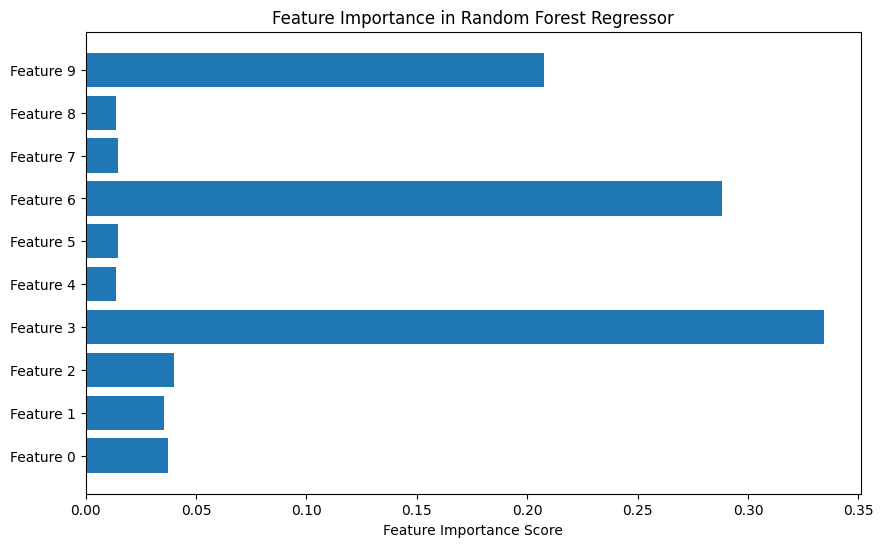

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Print the feature importance scores
print("Feature Importances:", feature_importances)

# Visualize the feature importances
features = [f"Feature {i}" for i in range(X.shape[1])]  # Feature names (e.g., Feature 0, Feature 1, ...)
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()


30.  Train an ensemble model using both Bagging and Random Forest and compare accuracy.


In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model as the base estimator for Bagging
log_reg = LogisticRegression(max_iter=1000)

# Create a Bagging Classifier using Logistic Regression as the base estimator
bagging_model = BaggingClassifier(estimator=log_reg, n_estimators=50, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train both models
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for both models
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy comparison
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")


Accuracy of Bagging Classifier: 0.8550
Accuracy of Random Forest Classifier: 0.9000


31. Train a Random Forest Classifier and tune hyperparameters using GridSearch.

In [44]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=500, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a smaller parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10],     # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum samples required to be at a leaf node
}

# Initialize GridSearchCV with 3-fold cross-validation and parallel processing
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        68
           1       0.99      0.89      0.94        82

    accuracy                           0.93       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150



32. Train a Bagging Regressor with different numbers of base estimators and compare performance

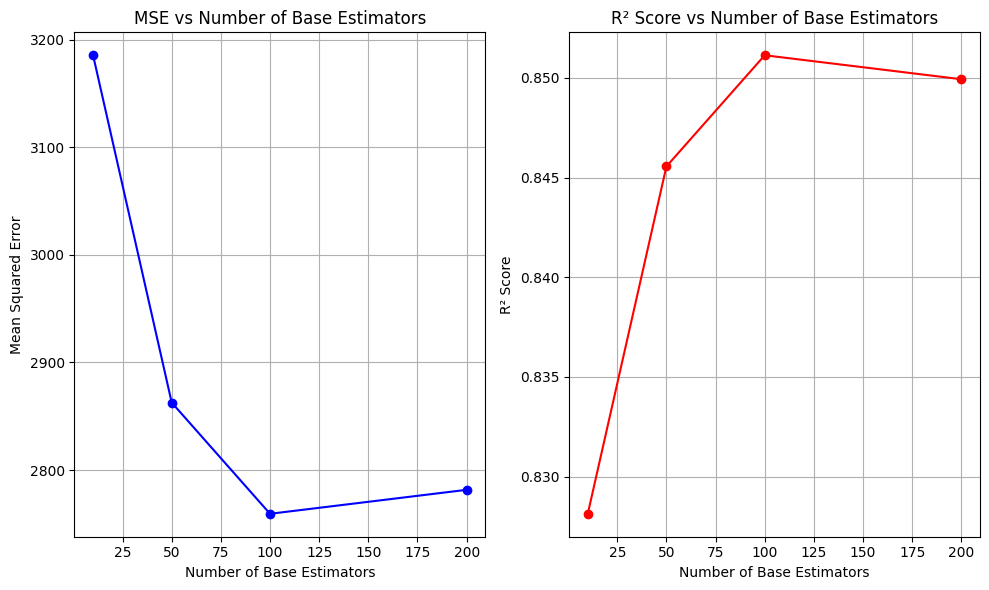

Base Estimators: 10, MSE: 3185.7125, R²: 0.8281
Base Estimators: 50, MSE: 2862.7045, R²: 0.8456
Base Estimators: 100, MSE: 2759.2939, R²: 0.8511
Base Estimators: 200, MSE: 2781.5883, R²: 0.8499


In [23]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Create a regression dataset (you can replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different numbers of base estimators to test
n_estimators_list = [10, 50, 100, 200]

# Store results for comparison
results = []

# Train a Bagging Regressor with different numbers of base estimators
for n_estimators in n_estimators_list:
    # Initialize the Bagging Regressor (using default base estimator, DecisionTreeRegressor)
    bagging_regressor = BaggingRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Calculate performance metrics (MSE and R² score)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append((n_estimators, mse, r2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plotting the results to compare performance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(results[:, 0], results[:, 1], marker='o', color='b', label='MSE')
plt.title('MSE vs Number of Base Estimators')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results[:, 0], results[:, 2], marker='o', color='r', label='R² Score')
plt.title('R² Score vs Number of Base Estimators')
plt.xlabel('Number of Base Estimators')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print results for each n_estimators tested
for n_estimators, mse, r2 in results:
    print(f"Base Estimators: {int(n_estimators)}, MSE: {mse:.4f}, R²: {r2:.4f}")


33. Train a Random Forest Classifier and analyze misclassified samples

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       154
           1       0.88      0.89      0.88       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



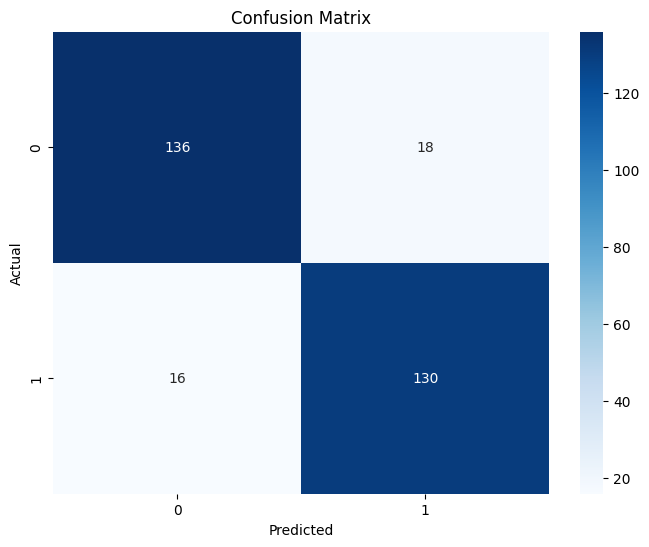


Misclassified Samples:
Sample Index: 3, Actual: 0, Predicted: 1
Sample Index: 5, Actual: 0, Predicted: 1
Sample Index: 24, Actual: 0, Predicted: 1
Sample Index: 26, Actual: 1, Predicted: 0
Sample Index: 28, Actual: 1, Predicted: 0
Sample Index: 33, Actual: 1, Predicted: 0
Sample Index: 41, Actual: 0, Predicted: 1
Sample Index: 43, Actual: 0, Predicted: 1
Sample Index: 58, Actual: 1, Predicted: 0
Sample Index: 60, Actual: 1, Predicted: 0
Sample Index: 73, Actual: 0, Predicted: 1
Sample Index: 78, Actual: 0, Predicted: 1
Sample Index: 83, Actual: 0, Predicted: 1
Sample Index: 86, Actual: 1, Predicted: 0
Sample Index: 100, Actual: 0, Predicted: 1
Sample Index: 122, Actual: 1, Predicted: 0
Sample Index: 125, Actual: 1, Predicted: 0
Sample Index: 128, Actual: 0, Predicted: 1
Sample Index: 135, Actual: 0, Predicted: 1
Sample Index: 140, Actual: 0, Predicted: 1
Sample Index: 149, Actual: 1, Predicted: 0
Sample Index: 160, Actual: 0, Predicted: 1
Sample Index: 163, Actual: 0, Predicted: 1
Sam

In [24]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic classification dataset (you can replace this with your own dataset)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Find misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Display misclassified samples
print("\nMisclassified Samples:")
for idx in misclassified_indices:
    print(f"Sample Index: {idx}, Actual: {y_test[idx]}, Predicted: {y_pred[idx]}")

# Optionally, if you want to inspect specific features of the misclassified samples
# Displaying first 5 misclassified samples as an example
print("\nFirst 5 Misclassified Samples (Feature values):")
for idx in misclassified_indices[:5]:
    print(f"Sample {idx} - Features: {X_test[idx]}")


34.  Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       154
           1       0.76      0.82      0.79       146

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

Bagging Classifier Performance:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       154
           1       0.88      0.91      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


Accuracy of Decision Tree: 0.7900
Accuracy of Bagging Classifier: 0.8967


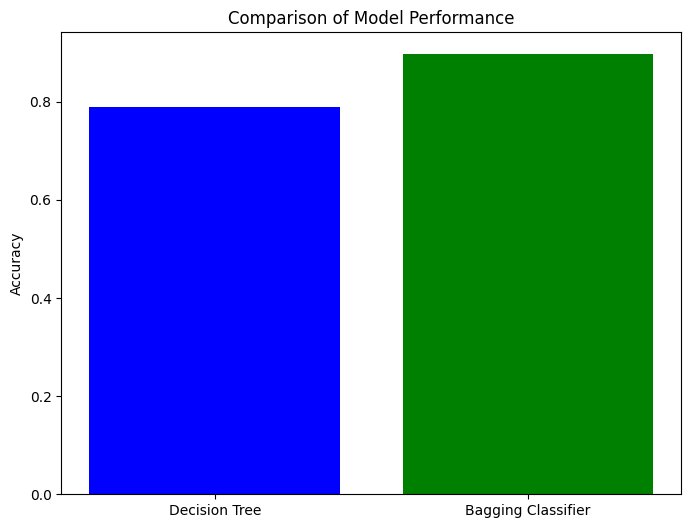

In [26]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train both models
dt_classifier.fit(X_train, y_train)
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the performance of both models
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))

print("Bagging Classifier Performance:")
print(classification_report(y_test, y_pred_bagging))

# Compare accuracy of both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"\nAccuracy of Decision Tree: {accuracy_dt:.4f}")
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")

# Plot the performance comparison
models = ['Decision Tree', 'Bagging Classifier']
accuracies = [accuracy_dt, accuracy_bagging]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance')
plt.show()


35. Train a Random Forest Classifier and visualize the confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       154
           1       0.88      0.89      0.88       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



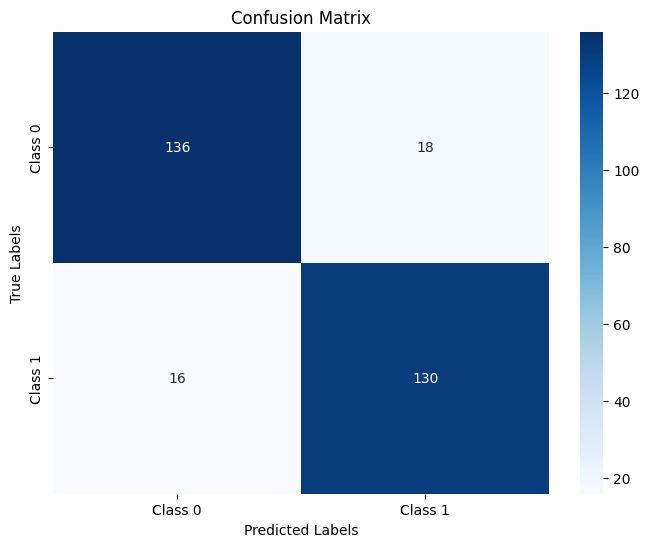

In [27]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

Accuracy of Decision Tree: 0.7900
Accuracy of SVM: 0.9233
Accuracy of Logistic Regression: 0.8333
Accuracy of Stacking Classifier: 0.9300


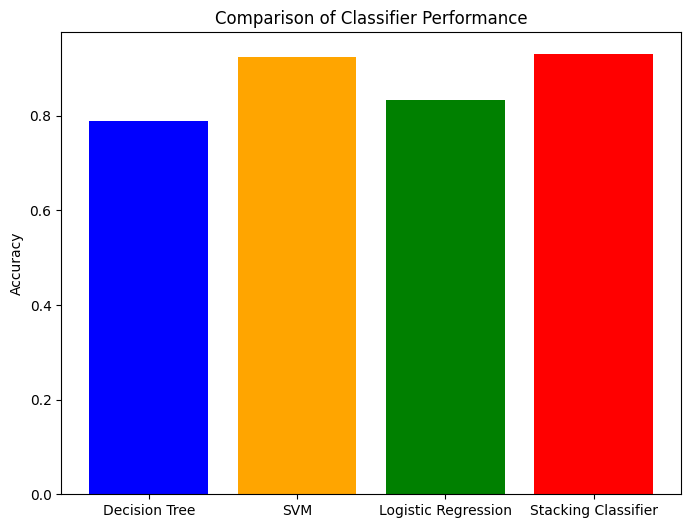

In [28]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
lr_classifier = LogisticRegression(random_state=42)

# Define the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=[('dt', dt_classifier), ('svm', svm_classifier), ('lr', lr_classifier)],
    final_estimator=LogisticRegression()
)

# Initialize individual classifiers
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
lr = LogisticRegression(random_state=42)

# Train the classifiers
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print accuracy results
print(f"Accuracy of Decision Tree: {accuracy_dt:.4f}")
print(f"Accuracy of SVM: {accuracy_svm:.4f}")
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")
print(f"Accuracy of Stacking Classifier: {accuracy_stacking:.4f}")

# Plot the performance comparison
models = ['Decision Tree', 'SVM', 'Logistic Regression', 'Stacking Classifier']
accuracies = [accuracy_dt, accuracy_svm, accuracy_lr, accuracy_stacking]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Performance')
plt.show()


37. Train a Random Forest Classifier and print the top 5 most important features

In [29]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to view feature importance values with feature names
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df_sorted = features_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
top_5_features = features_df_sorted.head(5)
print("Top 5 Most Important Features:")
print(top_5_features)


Top 5 Most Important Features:
     Feature  Importance
0  Feature 0    0.137744
8  Feature 8    0.096396
7  Feature 7    0.082179
3  Feature 3    0.060555
6  Feature 6    0.057719


38.  Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [31]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Classifier with a Decision Tree base estimator
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(),
                                      n_estimators=50, random_state=42)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optionally, print the full classification report for a detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Precision: 0.8808
Recall: 0.9110
F1 Score: 0.8956

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       154
           1       0.88      0.91      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



39.  Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

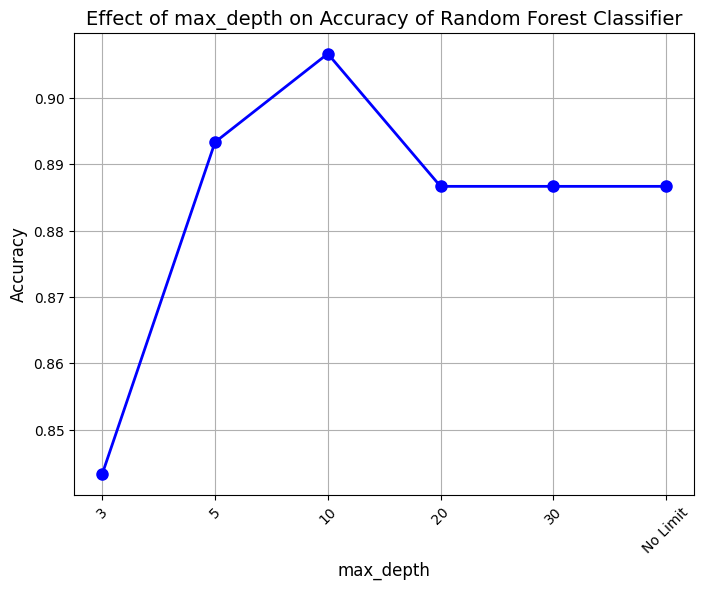

max_depth = 3, Accuracy = 0.8433
max_depth = 5, Accuracy = 0.8933
max_depth = 10, Accuracy = 0.9067
max_depth = 20, Accuracy = 0.8867
max_depth = 30, Accuracy = 0.8867
max_depth = None, Accuracy = 0.8867


In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Create a synthetic classification dataset (replace with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different max_depth values to test
max_depth_values = [3, 5, 10, 20, 30, None]  # None means no limit to depth

# Initialize a list to store the accuracy scores for each max_depth value
accuracies = []

# Train and evaluate the Random Forest Classifier for each max_depth value
for max_depth in max_depth_values:
    # Initialize the Random Forest Classifier with the current max_depth
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Convert max_depth values to strings for proper display on the x-axis
max_depth_labels = [str(md) if md is not None else 'No Limit' for md in max_depth_values]

# Plot the accuracy scores against different max_depth values
plt.figure(figsize=(8, 6))
plt.plot(max_depth_labels, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Effect of max_depth on Accuracy of Random Forest Classifier', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(max_depth_labels, rotation=45)  # Rotate labels if needed
plt.show()

# Print the accuracy for each max_depth
for max_depth, accuracy in zip(max_depth_values, accuracies):
    print(f"max_depth = {max_depth}, Accuracy = {accuracy:.4f}")


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance

Decision Tree - MAE: 69.8961, MSE: 7746.5214, R^2: 0.7970
K-Neighbors - MAE: 99.6258, MSE: 15459.0469, R^2: 0.5950


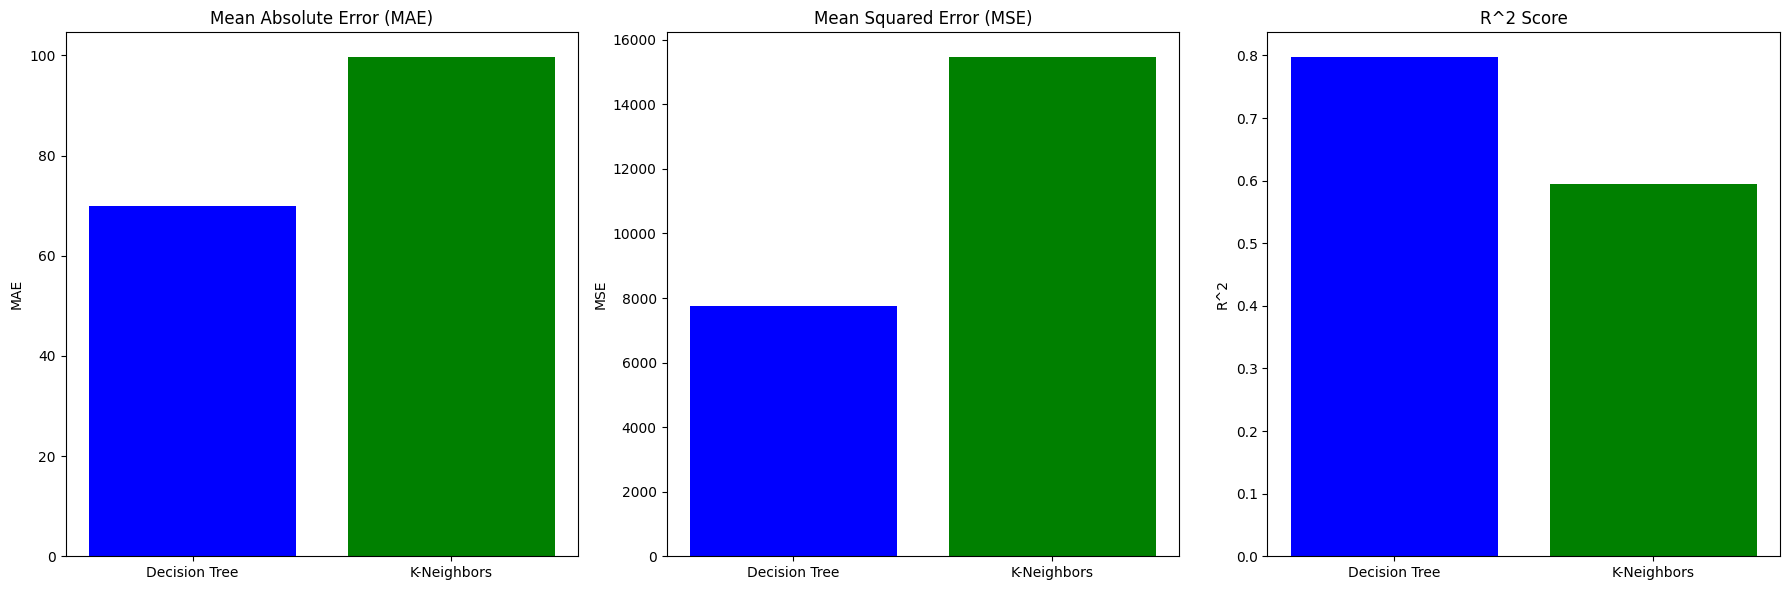

In [35]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Create a synthetic regression dataset (you can replace this with your own dataset)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Regressor with DecisionTreeRegressor as the estimator
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(),
                              n_estimators=50, random_state=42)

# Initialize the Bagging Regressor with KNeighborsRegressor as the estimator
bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(),
                               n_estimators=50, random_state=42)

# Train the models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics for both models
print(f"Decision Tree - MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R^2: {r2_dt:.4f}")
print(f"K-Neighbors - MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, R^2: {r2_knn:.4f}")

# Plot the comparison of performance
models = ['Decision Tree', 'K-Neighbors']
mae_values = [mae_dt, mae_knn]
mse_values = [mse_dt, mse_knn]
r2_values = [r2_dt, r2_knn]

# Create a bar plot for MAE, MSE, and R^2
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
axes[0].bar(models, mae_values, color=['blue', 'green'])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')

# Plot MSE
axes[1].bar(models, mse_values, color=['blue', 'green'])
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')

# Plot R^2
axes[2].bar(models, r2_values, color=['blue', 'green'])
axes[2].set_title('R^2 Score')
axes[2].set_ylabel('R^2')

plt.tight_layout()
plt.show()


41. = Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

ROC-AUC Score: 0.9638


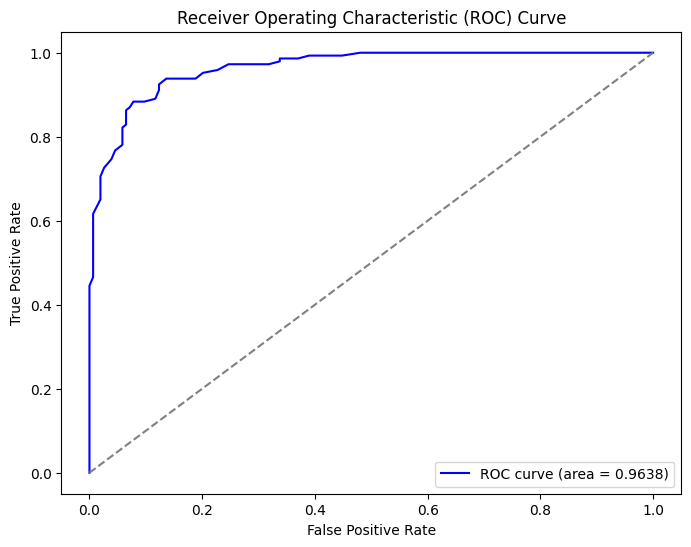

In [36]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set (probabilities for ROC curve)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


42. Train a Bagging Classifier and evaluate its performance using cross-validatioN

In [37]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, accuracy_score

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Classifier with a Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                      n_estimators=50, random_state=42)

# Perform cross-validation and evaluate the performance (using accuracy as the metric)
cv_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and the average accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation scores: [0.90714286 0.86428571 0.84285714 0.80714286 0.87142857]
Average accuracy: 0.8586 ± 0.0330


43. Train a Random Forest Classifier and plot the Precision-Recall curvE

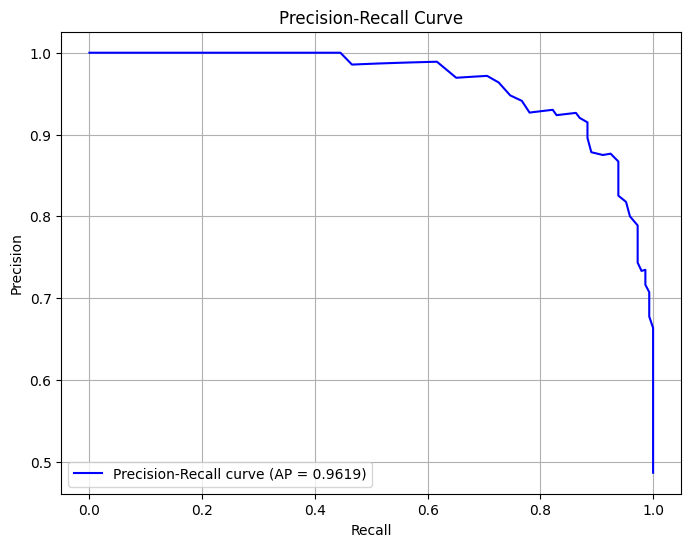

Average Precision (AUC-PR): 0.9619


In [38]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate average precision score (AUC for Precision-Recall curve)
avg_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Optionally print the average precision score
print(f"Average Precision (AUC-PR): {avg_precision:.4f}")


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [39]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Create a synthetic classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base models for the Stacking Classifier
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Initialize the Stacking Classifier with a Logistic Regression as the final estimator
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.8833


45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.


Mean Squared Error (max_samples=0.5): 8189.8652
Mean Squared Error (max_samples=0.7): 7504.7678
Mean Squared Error (max_samples=1.0): 7746.5214


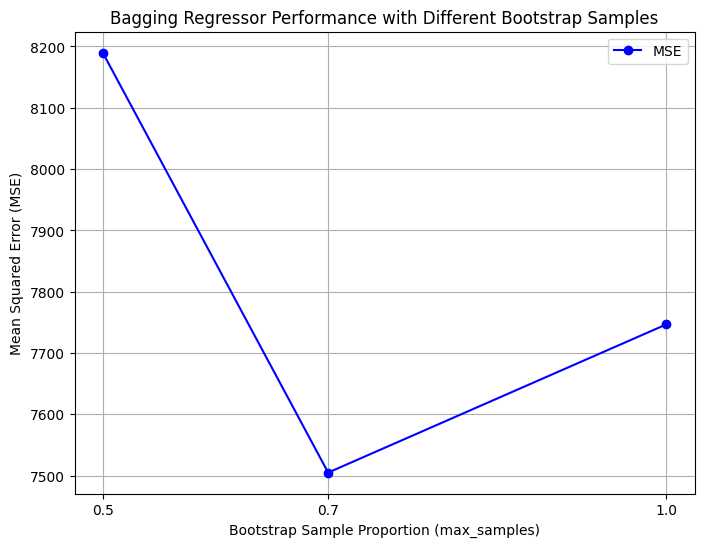

In [41]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Create a synthetic regression dataset (you can replace this with your own dataset)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different levels of bootstrap samples
bootstrap_samples = [0.5, 0.7, 1.0]
mse_scores = []

# Train and evaluate Bagging Regressor with different max_samples
for max_samples in bootstrap_samples:
    # Initialize the Bagging Regressor with the default base estimator (DecisionTreeRegressor)
    bagging_regressor = BaggingRegressor(n_estimators=50, max_samples=max_samples, random_state=42)

    # Train the model
    bagging_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_regressor.predict(X_test)

    # Evaluate the performance using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Mean Squared Error (max_samples={max_samples}): {mse:.4f}")

# Plot the performance comparison
plt.figure(figsize=(8, 6))
plt.plot(bootstrap_samples, mse_scores, marker='o', color='blue', linestyle='-', label='MSE')
plt.xlabel('Bootstrap Sample Proportion (max_samples)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bagging Regressor Performance with Different Bootstrap Samples')
plt.xticks(bootstrap_samples)
plt.grid(True)
plt.legend()
plt.show()
